<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/CNN_without_Fed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [5]:
image_size = (128, 128)
train_images = []
train_labels = []
test_images = []
test_labels = []


In [6]:
def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)

In [7]:
load_and_preprocess_images(train_directory, train_images, train_labels)

In [8]:
load_and_preprocess_images(test_directory, test_images, test_labels)

In [9]:
label_encoder = LabelEncoder()
train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)

In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)

In [12]:
augmented_images = []

for image in X_train:
    augmented_image = datagen.random_transform(image)
    augmented_images.append(augmented_image)

In [13]:

X_train_augmented = np.array(augmented_images)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5722, 128, 128, 3)
y_train shape: (5722,)
X_test shape: (1311, 128, 128, 3)
y_test shape: (1311,)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [28]:
# model_CNN = tf.keras.Sequential()
# model_CNN.add(layers.InputLayer(input_shape=(128, 128, 3)))

# model_CNN.add(layers.Conv2D(32, (5, 5), activation='relu'))
# model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model_CNN.add(layers.BatchNormalization())
# model_CNN.add(layers.Dropout(0.25))

# model_CNN.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model_CNN.add(layers.BatchNormalization())
# model_CNN.add(layers.Dropout(0.25))

# model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model_CNN.add(layers.BatchNormalization())
# model_CNN.add(layers.Dropout(0.25))

# model_CNN.add(layers.Conv2D(256, (2, 2), activation='relu'))
# model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model_CNN.add(layers.BatchNormalization())
# model_CNN.add(layers.Dropout(0.25))

# model_CNN.add(layers.Flatten())
# model_CNN.add(layers.Dense(2048, activation='relu'))
# model_CNN.add(layers.Dropout(0.25))
# model_CNN.add(layers.Dense(4, activation='softmax'))

# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
# model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
class VGG16:
    @staticmethod
    def build(shape, classes):
        model_CNN = Sequential()
        model_CNN.add(Conv2D(input_shape=shape,filters=32,kernel_size=(3,3),padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
        model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model_CNN.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model_CNN.add(Flatten())
        model_CNN.add(Dense(units=4096,activation="relu"))
        model_CNN.add(Dense(units=4096,activation="relu"))
        model_CNN.add(Dense(units=classes, activation="softmax"))
        return model_CNN

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
num_classes=4
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)
# Create an instance of the VGG16 model
vgg16_model_CNN = VGG16.build(shape=(128, 128, 3), classes=num_classes)
optimizer = Adam(learning_rate=0.001)
vgg16_model_CNN.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy'])

history_CNN = vgg16_model_CNN.fit(
    X_train, y_train_encoded,
    batch_size=64,
    epochs=10,
)

# Evaluate the model
test_loss, test_accuracy = vgg16_model_CNN.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/10
90/90 [==============================] - 2027s 22s/step - loss: 3.3277 - accuracy: 0.3464
Epoch 2/10
90/90 [==============================] - 2015s 22s/step - loss: 0.7011 - accuracy: 0.7106
Epoch 3/10
90/90 [==============================] - 2008s 22s/step - loss: 0.4380 - accuracy: 0.8403
Epoch 4/10
90/90 [==============================] - 2006s 22s/step - loss: 0.3229 - accuracy: 0.8841
Epoch 5/10
90/90 [==============================] - 2007s 22s/step - loss: 0.2740 - accuracy: 0.9009
Epoch 6/10
90/90 [==============================] - 2008s 22s/step - loss: 0.2290 - accuracy: 0.9163
Epoch 7/10
90/90 [==============================] - 2014s 22s/step - loss: 0.2054 - accuracy: 0.9271
Epoch 8/10
90/90 [==============================] - 2014s 22s/step - loss: 0.1961 - accuracy: 0.9294
Epoch 9/10
90/90 [==============================] - 2011s 22s/step - loss: 0.1543 - accuracy: 0.9437
Epoch 10/10
41/41 [==============================] - 117s 3s/step - loss: 0.2821 - accuracy

In [ ]:
import time

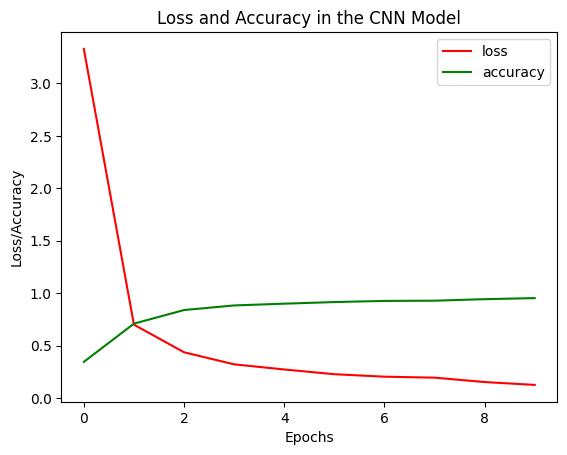

In [19]:
import matplotlib.pyplot as plt
plt.plot(history_CNN.history["loss"], c="red")
plt.plot(history_CNN.history["accuracy"], c="green")
plt.title("Loss and Accuracy in the CNN Model")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend(['loss', 'accuracy'])
plt.show()

In [31]:
predictions_CNN = np.argmax (model_CNN.predict(X_test), axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, predictions_CNN))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the CNN model.")
plt.show()

NameError: ignored